## Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. 

For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [122]:
# importing training data set first

df = pd.read_csv("train.csv")

In [123]:
# the shape of data set
df.shape

(1168, 81)

There are 80 independent columns and 1 dependent column. We need to optimize the number of columns we take for modelling.

In [124]:
#importing the testing data set
df_test = pd.read_csv("test.csv")

In [125]:
# the shape of testing set
df_test.shape

(292, 80)

The 80 columns here are the independent variables. we need to predict the target value by using machine learning model.

Note:

Anychanges we make to the training data set needs to be made to the testing dataset before predicting the outcomes.
Even the order of columns must be identical

In [126]:
#first lets seperate categorical and numerical columns

print(len(df.columns))

df.columns

81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Seperating the columns based on the data description provided and their data types.

In [127]:
categ = ["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities" ,
        "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
        "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
         "ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
        "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
        "KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType",
        "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature",
        "MoSold",'SaleType',"SaleCondition"]
conti = ["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd",
        "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","LowQualFinSF","GrLivArea","GarageYrBlt","GarageArea",
        "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
        "MiscVal","YrSold"]

In [128]:
len(categ)

54

In [129]:
len(conti)

25

81 are the total number of columns...
54 are categorical and 25 are continuos...
Id column is ignored and SalePrice is our target column

In [130]:
pd.options.display.max_rows = None

In [131]:
# Lets check if we classified correctly.

# categorical variables are countable or nominal.
for i in categ:
    print(i , df[i].unique())

MSSubClass [120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['IR1' 'Reg' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub']
LotConfig ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2 ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll

There is no need to convert strings type to numerical, but we will adress the nan values later.

In [132]:
for i in conti:
    print(i , len(df[i].unique()))

LotFrontage 107
LotArea 892
OverallQual 10
OverallCond 9
YearBuilt 110
YearRemodAdd 61
MasVnrArea 284
BsmtFinSF1 551
BsmtFinSF2 122
BsmtUnfSF 681
TotalBsmtSF 636
1stFlrSF 669
2ndFlrSF 351
LowQualFinSF 21
GrLivArea 746
GarageYrBlt 98
GarageArea 392
WoodDeckSF 244
OpenPorchSF 176
EnclosedPorch 106
3SsnPorch 18
ScreenPorch 65
PoolArea 8
MiscVal 20
YrSold 5


In [133]:
for i in conti:
    if len(df[i].unique()) <=20:
        print(i, df[i].unique())

OverallQual [ 6  8  7  5  9  1  2  4  3 10]
OverallCond [5 6 7 4 8 2 3 9 1]
3SsnPorch [  0 245 196 140 180  96 162 168 144 290 238 216 182 130 304  23 153 508]
PoolArea [  0 555 576 738 519 480 648 512]
MiscVal [    0   400  8300   600  1150   500  1200   480  1300  1400  2000   700
   620 15500   450   800    54   350   560  2500]
YrSold [2007 2010 2009 2006 2008]


Overall Qualtity and Condition are likert scale values from 1 -10...

Since, they are more than 5... Considering them as continuous variable.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are few columns with many values as null. Lets check their null values count and percentage.

In [135]:
for i in df.columns:
    print(i, "null count = ", df[i].isnull().sum() , " and percentage missing =" , (df[i].isnull().sum()*100/1168))

Id null count =  0  and percentage missing = 0.0
MSSubClass null count =  0  and percentage missing = 0.0
MSZoning null count =  0  and percentage missing = 0.0
LotFrontage null count =  214  and percentage missing = 18.32191780821918
LotArea null count =  0  and percentage missing = 0.0
Street null count =  0  and percentage missing = 0.0
Alley null count =  1091  and percentage missing = 93.40753424657534
LotShape null count =  0  and percentage missing = 0.0
LandContour null count =  0  and percentage missing = 0.0
Utilities null count =  0  and percentage missing = 0.0
LotConfig null count =  0  and percentage missing = 0.0
LandSlope null count =  0  and percentage missing = 0.0
Neighborhood null count =  0  and percentage missing = 0.0
Condition1 null count =  0  and percentage missing = 0.0
Condition2 null count =  0  and percentage missing = 0.0
BldgType null count =  0  and percentage missing = 0.0
HouseStyle null count =  0  and percentage missing = 0.0
OverallQual null count 

Alley has 93.4 % missing values.

FireplaceQu has 47.1% missing values.

PoolQC has 99.4% missing values.

Fence has 79.7% missing values.

MiscFeature has 96.2% null values.

It is hard to fill up these null values as the model may be biased for these varaibles if we fill them with one or few values.

However, lets find if we can find a relation between these variables and price.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

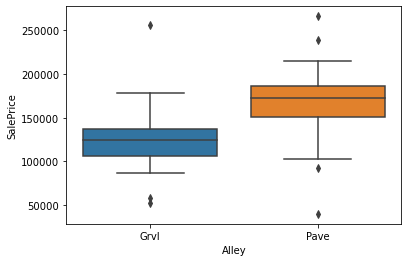

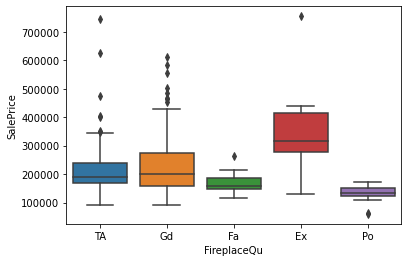

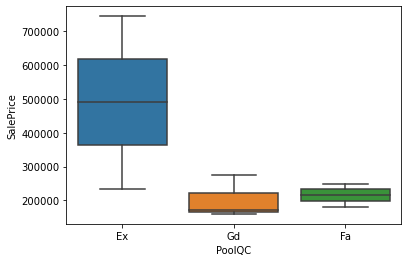

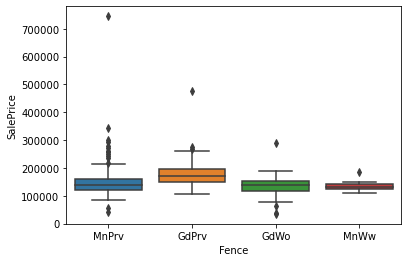

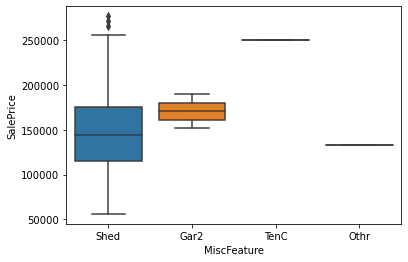

In [136]:
for i in ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]:
    plt.subplots()
    sns.boxplot(df[i],df['SalePrice'])

Though we can fill up these null values using mean or mode, the count of non null values are very less when compared to the length of the column. If we fill them, the model may be baised for these columns.

We will remove these columns ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]

LotFrontage has 18 % null values. (214)

MasVnrType and MasVnrArea has 0.59% null values. (7)

BsmtQual, BsmtCond has 2.56% null values. (30)

BsmtExposure has 2.65% null values. (31)

BsmtFinType1 has 2.56% null values. (30)

BsmtFinType2 has 2.65% null values. (31)

GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond has 5.47% null values. (64)

In [137]:
#Lets check if there are any common rows among the null values from the above.
nullcol1 = ["MasVnrType", "MasVnrArea"]
nullcol2 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
nullcol3 = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]

In [138]:
#checking the index of the row with columns (nullcol1) as null values
nullindex1 = [] #saving the indexes of common rows
for i in df.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df['MasVnrType'][i]) == True:
            if np.isnan(df['MasVnrArea'][i]) == True:
                print( i , "index row has both MasVnrType and MasVnrArea as null values")
                nullindex1.append(i)
    except:
        pass
print("\n no.of.common rows are ", len(nullindex1))

68 index row has both MasVnrType and MasVnrArea as null values
78 index row has both MasVnrType and MasVnrArea as null values
99 index row has both MasVnrType and MasVnrArea as null values
185 index row has both MasVnrType and MasVnrArea as null values
224 index row has both MasVnrType and MasVnrArea as null values
367 index row has both MasVnrType and MasVnrArea as null values
874 index row has both MasVnrType and MasVnrArea as null values

 no.of.common rows are  7


In [139]:
#checking if the above code gave correct indexes
df[nullcol1][df['MasVnrType'].isnull()]

MasVnrType  MasVnrArea
68         NaN         NaN
78         NaN         NaN
99         NaN         NaN
185        NaN         NaN
224        NaN         NaN
367        NaN         NaN
874        NaN         NaN

In [140]:
#checking the index of the row with columns (nullcol2) as null values
nullindex2=[]
for i in df.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df['BsmtQual'][i]) == True:
            if np.isnan(df['BsmtCond'][i]) == True:
                if np.isnan(df['BsmtExposure'][i]) == True:
                    if np.isnan(df['BsmtFinType1'][i]) == True:
                        if np.isnan(df['BsmtFinType2'][i]) == True:
                            print( i , "index row has both MasVnrType and MasVnrArea as null values")
                            nullindex2.append(i)
    except:
        pass
print("\n total number of common rows are ", len(nullindex2))

34 index row has both MasVnrType and MasVnrArea as null values
48 index row has both MasVnrType and MasVnrArea as null values
54 index row has both MasVnrType and MasVnrArea as null values
60 index row has both MasVnrType and MasVnrArea as null values
86 index row has both MasVnrType and MasVnrArea as null values
96 index row has both MasVnrType and MasVnrArea as null values
124 index row has both MasVnrType and MasVnrArea as null values
137 index row has both MasVnrType and MasVnrArea as null values
159 index row has both MasVnrType and MasVnrArea as null values
226 index row has both MasVnrType and MasVnrArea as null values
267 index row has both MasVnrType and MasVnrArea as null values
370 index row has both MasVnrType and MasVnrArea as null values
432 index row has both MasVnrType and MasVnrArea as null values
491 index row has both MasVnrType and MasVnrArea as null values
517 index row has both MasVnrType and MasVnrArea as null values
735 index row has both MasVnrType and MasVnrAr

In [141]:
#we have 30 null values in 3 columns and 31 null values in two columns
#Lets check if the two columns with 31 values have the last one common row. (BsmtExposure and BsmtFinType2)
j = 0
for i in df.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df['BsmtExposure'][i]) == True:
            if np.isnan(df['BsmtFinType2'][i]) == True:
                j+=1
    except:
        pass
    
print("no.of common rows ",j)

no.of common rows  30


The number 30 indicates that there are 30 rows with both the column values as null.

The one value which is missing (from a total of 31) in either columns are on different rows.

In [142]:
#checking the index of the row with columns (nullcol3) as null values
nullindex3 = []
for i in df.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df['GarageType'][i]) == True:
            if np.isnan(df['GarageYrBlt'][i]) == True:
                if np.isnan(df['GarageFinish'][i]) == True:
                    if np.isnan(df['GarageQual'][i]) == True:
                        if np.isnan(df['GarageCond'][i]) == True:
                            print( i , "index row has both MasVnrType and MasVnrArea as null values")
                            nullindex3.append(i)
    except:
        pass
print("\n total number of common rows are ", j)

48 index row has both MasVnrType and MasVnrArea as null values
72 index row has both MasVnrType and MasVnrArea as null values
74 index row has both MasVnrType and MasVnrArea as null values
105 index row has both MasVnrType and MasVnrArea as null values
116 index row has both MasVnrType and MasVnrArea as null values
123 index row has both MasVnrType and MasVnrArea as null values
127 index row has both MasVnrType and MasVnrArea as null values
149 index row has both MasVnrType and MasVnrArea as null values
180 index row has both MasVnrType and MasVnrArea as null values
184 index row has both MasVnrType and MasVnrArea as null values
197 index row has both MasVnrType and MasVnrArea as null values
227 index row has both MasVnrType and MasVnrArea as null values
314 index row has both MasVnrType and MasVnrArea as null values
327 index row has both MasVnrType and MasVnrArea as null values
333 index row has both MasVnrType and MasVnrArea as null values
378 index row has both MasVnrType and MasVn

Here we can see that the total number of null values missing on the above five columns (nullcol3) are from same rows only.

Garage related columns have missing values in same rows.

In [143]:
#removing the columns with many number of null values and id column
#i.e; ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"] and Id

df1 = df.drop(columns = ["Id","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"])

In [144]:
#the new categ and conti variables with remaining names of columns.

categ = categ = ["MSSubClass","MSZoning","Street","LotShape","LandContour","Utilities" ,
        "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
        "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
         "ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
        "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
        "KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","GarageType",
        "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive",
        "MoSold",'SaleType',"SaleCondition"]
conti = ["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd",
        "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","LowQualFinSF","GrLivArea","GarageYrBlt","GarageArea",
        "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
        "MiscVal","YrSold"]

In [145]:
print(nullcol1)
print(nullcol2)
print(nullcol3)

['MasVnrType', 'MasVnrArea']
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


The above column null values need to be adressed along with lot frontage columns. Since, they are the independent variables used for the prediction of sale price column, lets check if they have limited values and try to see their relation with saleprice

In [146]:
for i in (nullcol1 + nullcol2 + nullcol3):
    print( i, df[i].unique())

MasVnrType ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
MasVnrArea [0.000e+00 4.800e+02 1.260e+02 1.800e+02 6.700e+01 2.230e+02 6.600e+01
 8.200e+01 1.740e+02 3.040e+02 1.720e+02 1.660e+02 1.840e+02 3.500e+02
 4.120e+02 1.000e+00 1.890e+02 1.120e+02 5.000e+01 2.200e+02 1.600e+01
 6.300e+02 2.810e+02 2.870e+02 3.400e+02 2.160e+02       nan 1.400e+02
 1.830e+02 3.360e+02 3.960e+02 2.320e+02 3.200e+02 8.500e+01 1.620e+02
 1.540e+02 1.760e+02 1.200e+02 1.080e+02 2.520e+02 1.300e+02 3.510e+02
 5.710e+02 5.300e+01 2.040e+02 9.750e+02 6.530e+02 8.000e+01 4.720e+02
 3.400e+01 1.650e+02 2.370e+02 1.130e+02 9.000e+01 1.600e+02 1.470e+02
 1.360e+02 3.760e+02 8.900e+01 4.150e+02 2.000e+02 5.060e+02 2.860e+02
 4.500e+01 2.450e+02 2.470e+02 2.400e+02 7.000e+01 9.800e+01 6.040e+02
 8.600e+02 2.700e+01 1.530e+02 2.120e+02 2.060e+02 7.600e+02 2.960e+02
 5.280e+02 2.990e+02 3.380e+02 1.230e+02 2.330e+02 6.800e+01 3.910e+02
 2.100e+02 7.500e+01 9.600e+01 3.800e+02 3.620e+02 1.560e+02 3.990e+02
 7.400e+01 1.86

The MasVnrArea and GarageYrBlt are continuous variables.. we will check to fill nulls in these columns after filling the categorical variables.

In [147]:
nullfillcols = nullcol1 + nullcol2 + nullcol3
nullfillcols.remove("GarageYrBlt")
nullfillcols.remove("MasVnrArea")

print(nullfillcols)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

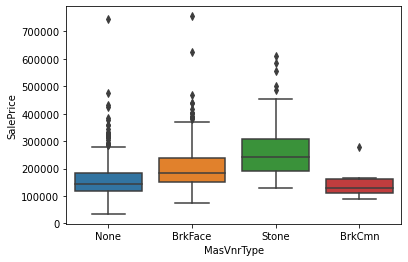

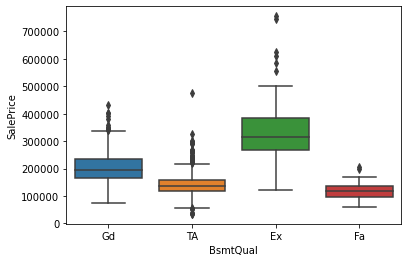

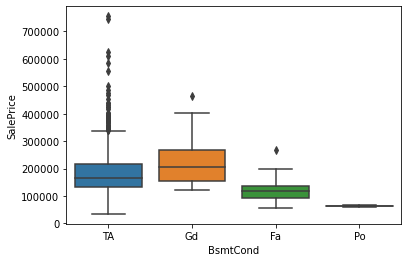

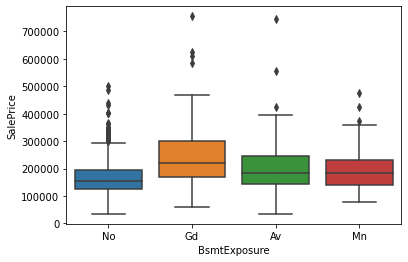

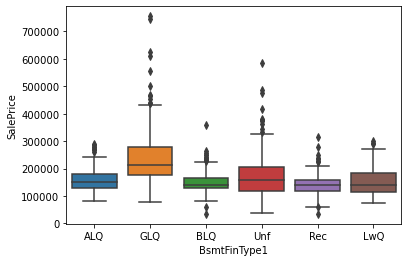

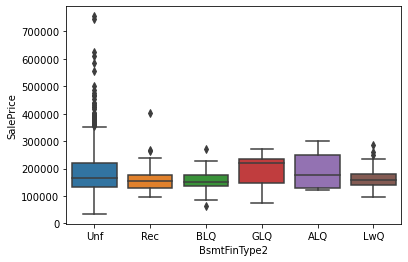

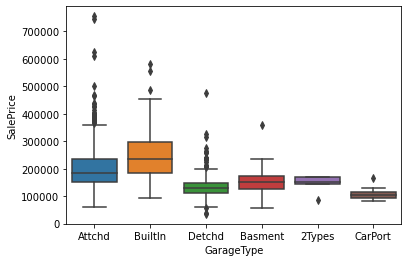

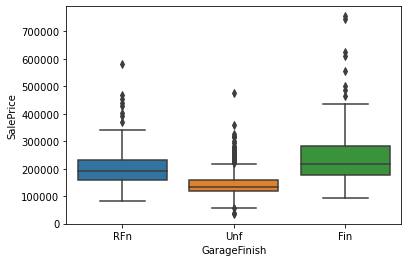

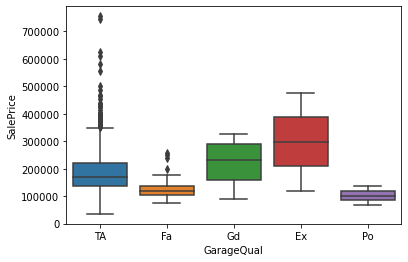

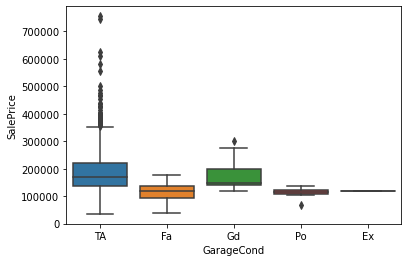

In [148]:
#checking the relation with saleprice column.
for i in nullfillcols:
    plt.subplots()
    sns.boxplot(df[i],df["SalePrice"])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

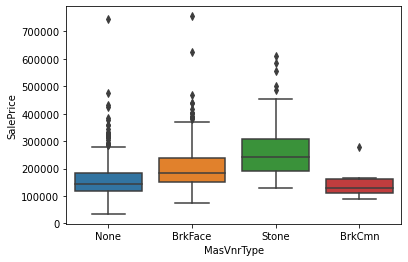

In [149]:
sns.boxplot(df["MasVnrType"],df["SalePrice"])

In [150]:
df["MasVnrType"].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [151]:
df1["SalePrice"].groupby(df["MasVnrType"]).mean()

MasVnrType
BrkCmn     141990.076923
BrkFace    205275.432203
None       158226.787356
Stone      261417.867347
Name: SalePrice, dtype: float64

In [152]:
df1["SalePrice"].groupby(df["MasVnrType"]).max()

MasVnrType
BrkCmn     277000
BrkFace    755000
None       745000
Stone      611657
Name: SalePrice, dtype: int64

In [153]:
df1["SalePrice"].groupby(df["MasVnrType"]).min()

MasVnrType
BrkCmn      89471
BrkFace     75000
None        34900
Stone      128000
Name: SalePrice, dtype: int64

In [154]:
df1["SalePrice"].max()

755000

In [155]:
df1["SalePrice"].min()

34900

In [156]:
#Lets create the price classes for MasVnrType.

#BrkCmn min = 89471 , max = 277000 , avg = 141990
#BrkFace min = 75000 , max = 755000, avg = 205275
#None min = 34900 , max = 745000, avg = 158226
#Stone min = 128000 , max = 611657, avg = 261417

#depending on the above info
#we can see that BrkCmn has less max and avg.... Stone has high avg.... 
#BrckFace has high avg and None has second avg.

In [157]:
#lets check the value counts
df1["MasVnrType"].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

None and Brckface are the ones with most values in the column. Lets fill nulls with None.

In [158]:
df1["MasVnrType"].fillna(value="None",inplace = True)

In [159]:
for i in nullfillcols:
    print(i)
    print(df1[i].value_counts())
    print("avg = ", df1["SalePrice"].groupby(df1[i]).mean())
    print("min = ", df1["SalePrice"].groupby(df1[i]).min())
    print("max = ", df1["SalePrice"].groupby(df1[i]).max())
    print("\n\n")

MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64
avg =  MasVnrType
BrkCmn     141990.076923
BrkFace    205275.432203
None       159079.399716
Stone      261417.867347
Name: SalePrice, dtype: float64
min =  MasVnrType
BrkCmn      89471
BrkFace     75000
None        34900
Stone      128000
Name: SalePrice, dtype: int64
max =  MasVnrType
BrkCmn     277000
BrkFace    755000
None       745000
Stone      611657
Name: SalePrice, dtype: int64



BsmtQual
TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64
avg =  BsmtQual
Ex    331469.978723
Fa    121349.000000
Gd    203225.445783
TA    140898.736944
Name: SalePrice, dtype: float64
min =  BsmtQual
Ex    123500
Fa     61000
Gd     75500
TA     34900
Name: SalePrice, dtype: int64
max =  BsmtQual
Ex    755000
Fa    206900
Gd    430000
TA    475000
Name: SalePrice, dtype: int64



BsmtCond
TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64
avg =  BsmtCond
Fa

In [160]:
#in BsmtQual.... TA & Gd are repeated most.... with minimal difference in max and min price... Lets fill the nulls with Gd
df1["BsmtQual"].fillna(value="Gd",inplace = True)
#in BsmtCond.... TA has 1041 values which is more than 85%... so we fill it with TA
df1["BsmtCond"].fillna(value="TA",inplace = True)
#BsmtExposure... Filling it with the most repeated value No
df1["BsmtExposure"].fillna(value="No",inplace = True)
#BsmtFinType1... averages are almost near to each other group averages... lets fill it using forward fill method
df1["BsmtFinType1"].fillna(method="ffill",inplace = True)
#BsmtFinType2... Unf is the most repeated value
df1["BsmtFinType2"].fillna(value="Unf",inplace = True)
#GarageType... Attchd is the most repeated value
df1["GarageType"].fillna(value="Attchd",inplace = True)
#GarageFinish.. There are 3 values and slightly less difference in their no.of occurances... lets fill it using forward fill
df1["GarageFinish"].fillna(method='ffill',inplace = True)
#GarageQual... TA is the most repeated value..
df1["GarageQual"].fillna(value="TA",inplace = True)
#GarageCond... TA is the most repeated value..
df1["GarageCond"].fillna(value="TA",inplace = True)

In [161]:
df1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

LotFrontage, MasVnrArea and GarageYrBlt has null values to be addressed.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

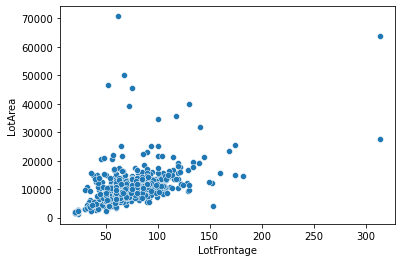

In [162]:
#Lets check for relationship between LotFrontage with LotArea and SalePrice.
sns.scatterplot(df1["LotFrontage"],df1["LotArea"])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

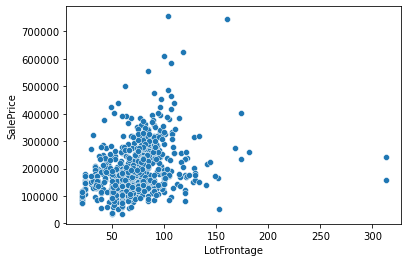

In [163]:
sns.scatterplot(df1["LotFrontage"],df1["SalePrice"])

we can identify that there is a linear relationship though it is not perfectly linear. Looks like there are few outliers.

In [164]:
#filling nan with mean
df1["LotFrontage"].fillna(value= round(df1["LotFrontage"].mean(),1),inplace=True)

In [165]:
df1["LotFrontage"].head()

0     71.0
1     95.0
2     92.0
3    105.0
4     71.0
Name: LotFrontage, dtype: float64

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrType', ylabel='MasVnrArea'>

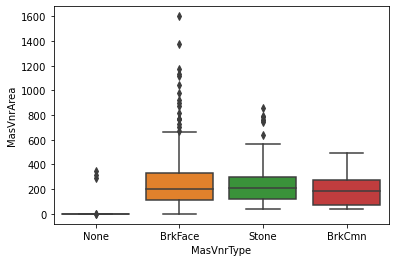

In [166]:
##Lets check for relationship between MasVnrArea with MasVnrType and SalePrice.
sns.boxplot(df1["MasVnrType"],df1["MasVnrArea"])

It looks like the average area for types other than none are near to same... We can also notice that, None type has 0 as min and max. 

Since, in MasVnrType we have handled nans by replacing it with None... we will fill 0 in corresponding MasVnrArea column as it indicates a good relation

We already have found that MasVnrType and MasVnrArea have null values in same index rows.

In [167]:
df1["MasVnrArea"].head()

0      0.0
1      0.0
2      0.0
3    480.0
4    126.0
Name: MasVnrArea, dtype: float64

In [168]:
df1["MasVnrArea"].fillna(value= 0.0 ,inplace=True)

In [169]:
# GarageYrBlt can be the same year as house built year.. Lets have a look at random rows.
df1[["GarageYrBlt","YearBuilt"]].sample(25)

GarageYrBlt  YearBuilt
854        1915.0       1915
885        2001.0       2001
269        1979.0       1979
440        1967.0       1967
960        1974.0       1972
42         2005.0       2005
981        1996.0       1996
586        2005.0       2005
993        1997.0       1997
1087       2003.0       2003
706        1971.0       1971
970        1976.0       1976
743        2004.0       2004
1026       1998.0       1998
801        1996.0       1996
82         1962.0       1962
755        1993.0       1993
161        1959.0       1959
214        1977.0       1977
109        1989.0       1970
996        2004.0       2004
700        1999.0       1999
787        2004.0       2004
252        1958.0       1958
903        1946.0       1946

We can notice that in most of the cases, YearBuilt and GarageYrBlt has same values.. Lets fill the nans in GarageYrBlt

In [170]:
for i in range(len(df1["GarageYrBlt"])):
    try:
        if np.isnan(df1["GarageYrBlt"][i]) == True:
            df1["GarageYrBlt"][i] = float(df1["YearBuilt"][i])
    except:
        pass

<ipython-input-170-602286c25b63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["GarageYrBlt"][i] = float(df1["YearBuilt"][i])


In [171]:
#since all nulls have been adressed, lets confirm it
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

All the null values have been addressed... Now lets move to the feature selection.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

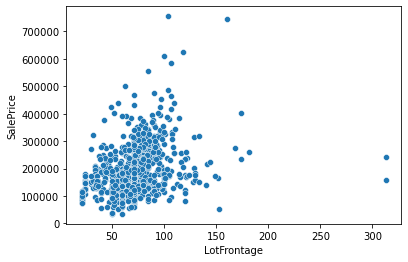

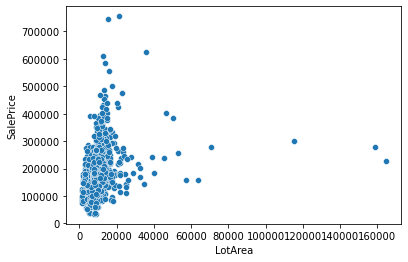

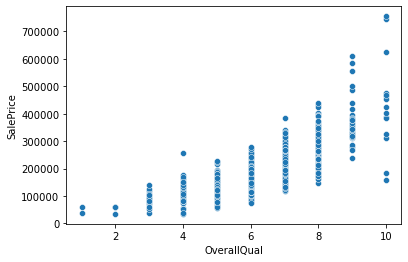

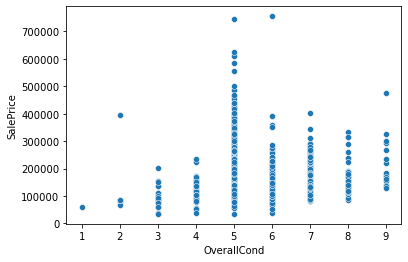

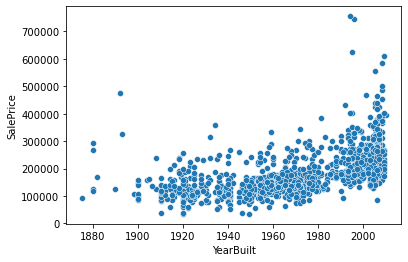

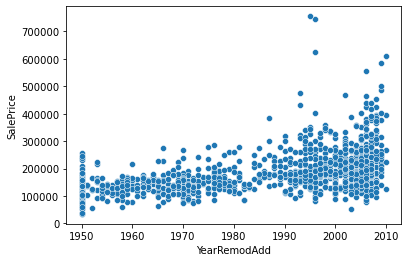

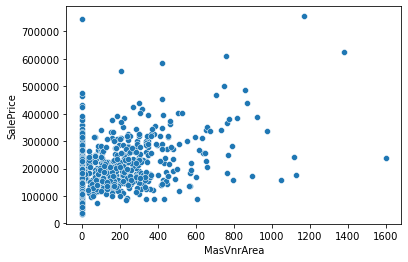

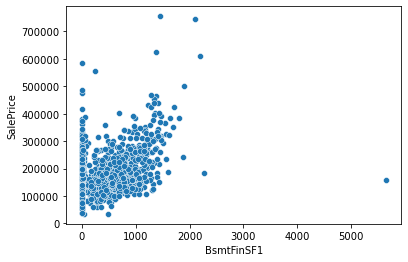

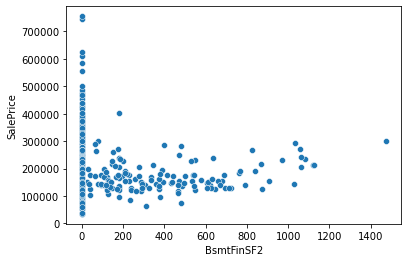

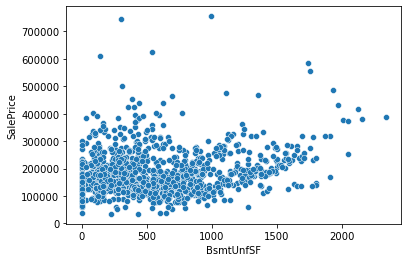

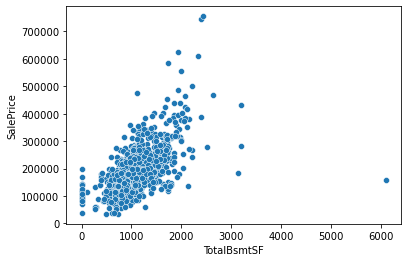

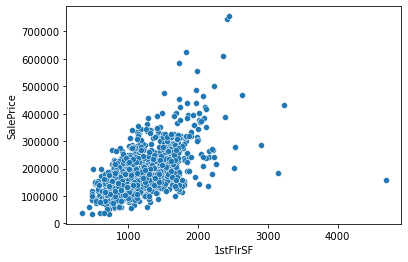

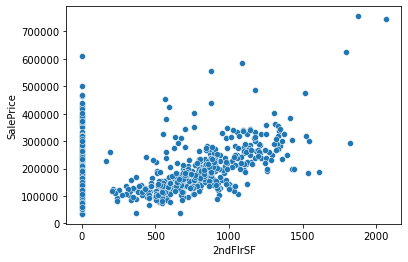

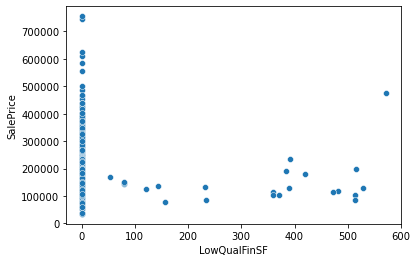

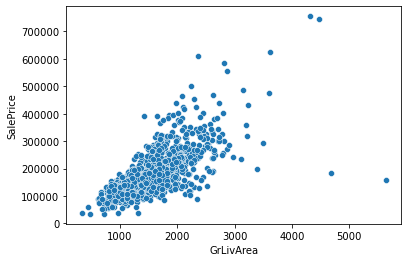

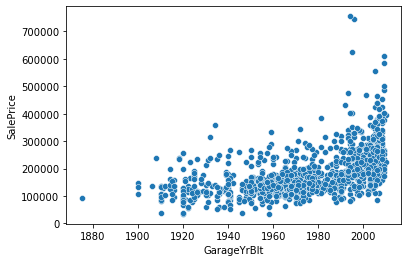

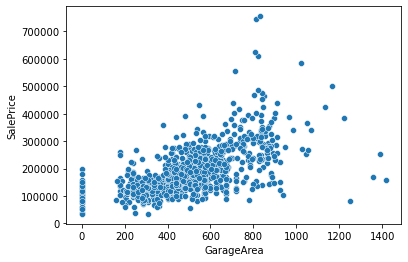

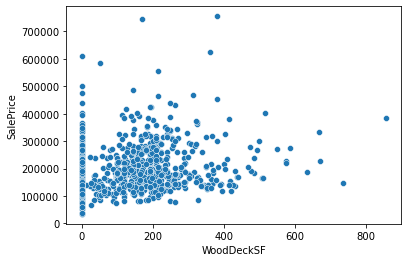

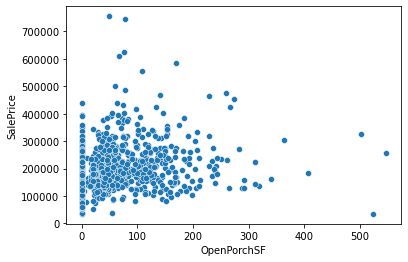

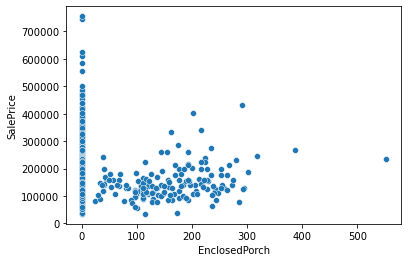

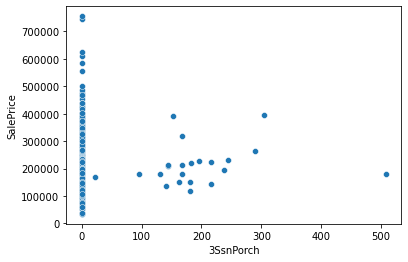

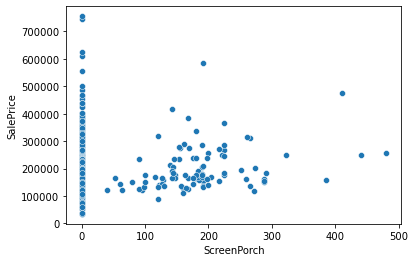

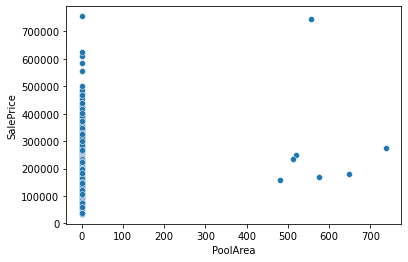

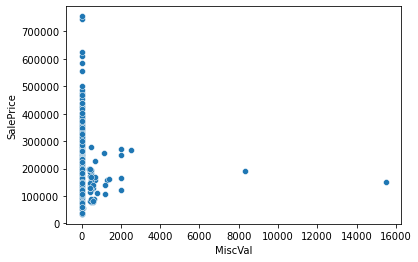

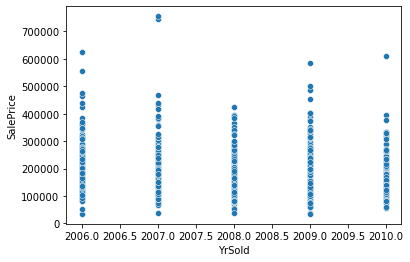

In [172]:
for i in conti:
    plt.subplots()
    sns.scatterplot(df1[i],df1["SalePrice"])

In [173]:
df1[["MasVnrArea","SalePrice"]].corr()

MasVnrArea  SalePrice
MasVnrArea    1.000000   0.460535
SalePrice     0.460535   1.000000

In [174]:
for i in conti:
    print( i, "has a pearson correlation coefficient of ", df1[i].corr(df1["SalePrice"]), "with SalePrice" )

LotFrontage has a pearson correlation coefficient of  0.32377786291111205 with SalePrice
LotArea has a pearson correlation coefficient of  0.24949855755169287 with SalePrice
OverallQual has a pearson correlation coefficient of  0.7891854326077522 with SalePrice
OverallCond has a pearson correlation coefficient of  -0.06564233066557862 with SalePrice
YearBuilt has a pearson correlation coefficient of  0.5144075581459779 with SalePrice
YearRemodAdd has a pearson correlation coefficient of  0.5078305923369403 with SalePrice
MasVnrArea has a pearson correlation coefficient of  0.46053469525637625 with SalePrice
BsmtFinSF1 has a pearson correlation coefficient of  0.3628743616872131 with SalePrice
BsmtFinSF2 has a pearson correlation coefficient of  -0.010150773483223198 with SalePrice
BsmtUnfSF has a pearson correlation coefficient of  0.21572414208173143 with SalePrice
TotalBsmtSF has a pearson correlation coefficient of  0.5950418180412798 with SalePrice
1stFlrSF has a pearson correlatio

We can see that ["OverallCond" , "BsmtFinSF2" , "LowQualFinSF" , "EnclosedPorch", "3SsnPorch" , "ScreenPorch" , "MiscVal" , "YrSold" ] shows almost a zero correlation with sale price.

In [175]:
# to check if multicollinearity exits.. (example:- year built and year sold does have a significance impact among themselves)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
df_vif = df1.copy()

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in categ:
    df_vif[i] = LE.fit_transform(df_vif[i])
    


In [177]:
df_vif.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          11         3         71.0     4928       1         0            3   
1           0         3         95.0    15865       1         0            3   
2           5         3         92.0     9920       1         0            3   
3           0         3        105.0    11751       1         0            3   
4           0         3         71.0    16635       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          4          1  ...              0          0   
2          0          1          0  ...              0          0   
3          0          4          0  ...              0          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       1    2007         8              4   
1          224         0        0       9    2007         8              4   
2            0         0        0       5    2007         8              4   
3            0         0        0       0    2010         0              4   
4            0         0        0       5    2009         8              4   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 75 columns]

In [178]:
df_vif.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32


In [179]:
df_vif = df_vif.astype(float)
    

In [180]:
# the independent variables set
X = df_vif.drop(columns = ["SalePrice"])
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),2)
                          for i in range(len(X.columns))]
  
print(vif_data)

C:\Users\AKHIL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\AKHIL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature       VIF
0      MSSubClass     11.12
1        MSZoning     32.36
2     LotFrontage     19.47
3         LotArea      4.11
4          Street    348.05
5        LotShape      3.62
6     LandContour     21.52
7       Utilities       NaN
8       LotConfig      5.05
9       LandSlope      1.67
10   Neighborhood      6.45
11     Condition1      7.44
12     Condition2     73.02
13       BldgType      5.33
14     HouseStyle      8.85
15    OverallQual     80.67
16    OverallCond     49.76
17      YearBuilt  39538.98
18   YearRemodAdd  26267.25
19      RoofStyle      5.02
20       RoofMatl      4.76
21    Exterior1st     38.33
22    Exterior2nd     36.25
23     MasVnrType     12.30
24     MasVnrArea      2.27
25      ExterQual     37.70
26      ExterCond     31.94
27     Foundation     10.09
28       BsmtQual     17.94
29       BsmtCond     21.72
30   BsmtExposure      7.59
31   BsmtFinType1      6.11
32     BsmtFinSF1       inf
33   BsmtFinType2     63.97
34     BsmtFinSF2   

Usually if VIF is greater than 10, then the independent variables are said to be highly correlated.

In this case we can see that, these variables are highly correlated to other independent variables. There are few variables with infinite VIF value... This means, they are probabaly the outcome of other variables...

Here, we can notice that 1stfloorsf, 2ndfloorsf are infinite and it is obvious that sf of all floors including basement will be same in most cases.

Although YearBuilt, YearRemodeled, YearSold will be related and have high vif value.. we can address this issue by merging these columns into one.. We will create a new column as age of the building which will be the difference between yearsold and yearbuilt

YearRemodAdd variable values are the year in which house is remodelled.. Few houses are not remodelled and their remod year is same as year built.. Lets change this to categorical varibale with values as 0 not remodelled, 1 remodelled.

utilities showing nan because it has only value for the entire length of column.

In [181]:
df1["Utilities"].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [182]:
df1 = df1.drop(columns = ["Utilities"])

In [183]:
df1["Age"] = df1["YrSold"] - df1["YearBuilt"]

In [184]:
df1[["YearBuilt","YrSold"]][0:10]

YearBuilt  YrSold
0       1976    2007
1       1970    2007
2       1996    2007
3       1977    2010
4       1977    2009
5       2006    2006
6       1957    2010
7       1957    2006
8       1965    2007
9       1947    2008

In [185]:
df1["Age"]

0        31
1        37
2        11
3        33
4        32
5         0
6        53
7        49
8        42
9        61
10       69
11        7
12        7
13       47
14       53
15       84
16       78
17        2
18       31
19       37
20        7
21       37
22       60
23       45
24       41
25       54
26       89
27        0
28       84
29       74
30        5
31       63
32       30
33       66
34       58
35       32
36       33
37       57
38       29
39       78
40       50
41       51
42        1
43        2
44       31
45       25
46        9
47       60
48       61
49       48
50        4
51       88
52       89
53       52
54       64
55        6
56       40
57       18
58       70
59        2
60       55
61       39
62        3
63       18
64       44
65        5
66       81
67       41
68       50
69       51
70        4
71        0
72       71
73       42
74       76
75        2
76       93
77       66
78        0
79        9
80        0
81       60
82       44
83  

In [186]:
remodelled = []
for i in range(len(df1["YearRemodAdd"])):
    if df1["YearRemodAdd"][i] == df1["YearBuilt"][i]:
        remodelled.append(0)  
    else:
        remodelled.append(1)
        
df1['Remodelled'] = remodelled

In [187]:
df1['Remodelled'].unique()

array([0, 1], dtype=int64)

In [188]:
df1['Remodelled'].value_counts()

0    598
1    570
Name: Remodelled, dtype: int64

The GarageYrBlt has a high vif value, lets change this to the age of garage (yearsold - garageYrBlt)

In [189]:
df1['GarageAge'] = df1["YrSold"] - df1["GarageYrBlt"]

We will even remove this variable.

lets create the new categ and conti variable as few columns have been removed and few are added.

In [190]:
categ = ["MSSubClass","MSZoning","Street","LotShape","LandContour",
        "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
        "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
         "ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
        "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
        "KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","GarageType",
        "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive",
        "MoSold",'SaleType',"SaleCondition","Remodelled"]
conti = ["LotFrontage","LotArea","OverallQual","OverallCond",
        "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea",
        "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
        "MiscVal","Age","GarageAge"]

In [191]:
#Lets remove those columns and check the new vif values.
df_vif = df1.copy()

for i in categ:
    df_vif[i] = LE.fit_transform(df_vif[i])

# the independent variables set
X = df_vif.drop(columns = ["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt","SalePrice"])
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),2)
                          for i in range(len(X.columns))]
  
print(vif_data)

C:\Users\AKHIL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature     VIF
0      MSSubClass   11.08
1        MSZoning   32.10
2     LotFrontage   19.30
3         LotArea    4.04
4          Street  256.21
5        LotShape    3.60
6     LandContour   20.85
7       LotConfig    5.02
8       LandSlope    1.64
9    Neighborhood    6.44
10     Condition1    7.28
11     Condition2   69.11
12       BldgType    5.27
13     HouseStyle    8.67
14    OverallQual   77.84
15    OverallCond   44.41
16      RoofStyle    5.04
17       RoofMatl    4.74
18    Exterior1st   38.01
19    Exterior2nd   36.24
20     MasVnrType   12.00
21     MasVnrArea    2.26
22      ExterQual   37.64
23      ExterCond   31.22
24     Foundation    9.98
25       BsmtQual   17.90
26       BsmtCond   21.49
27   BsmtExposure    7.58
28   BsmtFinType1    6.09
29     BsmtFinSF1     inf
30   BsmtFinType2   60.84
31     BsmtFinSF2     inf
32      BsmtUnfSF     inf
33    TotalBsmtSF     inf
34        Heating   16.26
35      HeatingQC    2.99
36     CentralAir   25.44
37     Elect

The higher vif valued columns have been removed but their presence is in the new form with less vif value.

In [192]:
df1[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]][0:10]

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0         120           0        958         1078
1         351         823       1043         2217
2         862           0        255         1117
3         705           0       1139         1844
4        1246           0        356         1602
5           0           0        879          879
6        1302           0         90         1392
7         168         682        284         1134
8         698          96        420         1214
9         442           0        390          832

We can see that TotalBsmtSF is the sum of the other three columns

In [194]:
df1[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea"]].sample(10)

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
557         1002         202          0         1204      1377       806   
1025        1309           0         35         1344      1344         0   
74           544           0          0          544       774         0   
1164           0           0          0            0      1126         0   
1007           0           0        780          780       825       587   
147          713           0        163          876       964         0   
666         1464           0        536         2000      2000         0   
923          719           0        300         1019      1357         0   
853          187         627          0          814       913         0   
768         1097           0          0         1097      1110         0   

      LowQualFinSF  GrLivArea  
557              0       2183  
1025             0       1344  
74               0        774  
1164             0       1126  
1007             0       1412  
147              0        964  
666              0       2000  
923              0       1357  
853              0        913  
768              0       1110

The GrLivArea is the sum of 1stFlrSf and 2ndFlrSF.. So, lets remove TotalBsmtSF and GrLivArea columns.

In [197]:
df1 = df1.drop(columns=["TotalBsmtSF","GrLivArea"])

In [196]:
df1["LowQualFinSF"].value_counts()

0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

Many houses doesnt have any Low Quality finished SF.

In [198]:
#updating the variables
categ = ["MSSubClass","MSZoning","Street","LotShape","LandContour",
        "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
        "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
         "ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
        "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
        "KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","GarageType",
        "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive",
        "MoSold",'SaleType',"SaleCondition","Remodelled"]
conti = ["LotFrontage","LotArea","OverallQual","OverallCond",
        "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF",
        "2ndFlrSF","LowQualFinSF","GarageArea",
        "WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
        "MiscVal","Age","GarageAge"]

In [199]:
#Lets remove those columns and check the new vif values.
df_vif = df1.copy()

for i in categ:
    df_vif[i] = LE.fit_transform(df_vif[i])

# the independent variables set
X = df_vif.drop(columns = ["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt","SalePrice"])
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [round(variance_inflation_factor(X.values, i),2)
                          for i in range(len(X.columns))]
  
print(vif_data)

          feature     VIF
0      MSSubClass   11.08
1        MSZoning   32.10
2     LotFrontage   19.30
3         LotArea    4.04
4          Street  256.21
5        LotShape    3.60
6     LandContour   20.85
7       LotConfig    5.02
8       LandSlope    1.64
9    Neighborhood    6.44
10     Condition1    7.28
11     Condition2   69.11
12       BldgType    5.27
13     HouseStyle    8.67
14    OverallQual   77.84
15    OverallCond   44.41
16      RoofStyle    5.04
17       RoofMatl    4.74
18    Exterior1st   38.01
19    Exterior2nd   36.24
20     MasVnrType   12.00
21     MasVnrArea    2.26
22      ExterQual   37.64
23      ExterCond   31.22
24     Foundation    9.98
25       BsmtQual   17.90
26       BsmtCond   21.49
27   BsmtExposure    7.58
28   BsmtFinType1    6.09
29     BsmtFinSF1   12.26
30   BsmtFinType2   60.84
31     BsmtFinSF2    3.04
32      BsmtUnfSF   13.28
33        Heating   16.26
34      HeatingQC    2.99
35     CentralAir   25.44
36     Electrical   18.15
37       1st

As we can see, The vif values which are infinite have been reduced when we dropped the TotalBsmtSF and GrLivArea columns... A little bit of multi collinearity has been removed... 

In [202]:
df1.drop(columns = ["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt"],inplace = True)

In [203]:
#Checking the correlation of updated continuos variables with sale price (method = Pearson)
for i in conti:
    print( i, "has a pearson correlation coefficient of ", df1[i].corr(df1["SalePrice"]), "with SalePrice" )

LotFrontage has a pearson correlation coefficient of  0.32377786291111205 with SalePrice
LotArea has a pearson correlation coefficient of  0.24949855755169287 with SalePrice
OverallQual has a pearson correlation coefficient of  0.7891854326077522 with SalePrice
OverallCond has a pearson correlation coefficient of  -0.06564233066557862 with SalePrice
MasVnrArea has a pearson correlation coefficient of  0.46053469525637625 with SalePrice
BsmtFinSF1 has a pearson correlation coefficient of  0.3628743616872131 with SalePrice
BsmtFinSF2 has a pearson correlation coefficient of  -0.010150773483223198 with SalePrice
BsmtUnfSF has a pearson correlation coefficient of  0.21572414208173143 with SalePrice
1stFlrSF has a pearson correlation coefficient of  0.5876422777362368 with SalePrice
2ndFlrSF has a pearson correlation coefficient of  0.3303862976369547 with SalePrice
LowQualFinSF has a pearson correlation coefficient of  -0.03238109391182774 with SalePrice
GarageArea has a pearson correlatio

OverallCond, BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3snPorch, ScreenPorch, PoolArea and MiscVal has near to zero correlation with SalePrice when using pearson method.

In [205]:
df1 = df1.drop(columns = ["OverallCond","BsmtFinSF2","LowQualFinSF","3SsnPorch","ScreenPorch","PoolArea","MiscVal"])

In [206]:
len(df1.columns)

64

In [209]:
#updating the variables
categ = ["MSSubClass","MSZoning","Street","LotShape","LandContour",
        "LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
        "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
         "ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
        "BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
        "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
        "KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","GarageType",
        "GarageFinish","GarageCars","GarageQual","GarageCond","PavedDrive",
        "MoSold",'SaleType',"SaleCondition","Remodelled"]
conti = ["LotFrontage","LotArea","OverallQual",
        "MasVnrArea","BsmtFinSF1","BsmtUnfSF","1stFlrSF",
        "2ndFlrSF","GarageArea",
        "WoodDeckSF","OpenPorchSF","EnclosedPorch",
        "Age","GarageAge"]

The above are the final variables which will be taken into modelling..

In [228]:
len(categ)+len(conti)

63

In [229]:
len(df1.columns)

64

In [230]:
df2 = df1.drop(columns=["SalePrice"]).copy()

Our variables are ready.. There might be a problem occurs while using test data as the no.of unique values in categorical columns may be mismatched in number.

To address the above issue, we will join the datasets, use encoding and split them to original shape

In [231]:
df2.shape

(1168, 63)

In [232]:
df_test.shape

(292, 80)

We need to perform the same steps in order which we have used with training data

In [234]:
df_test1 = df_test.drop(columns = ["Id","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"])

In [236]:
for i in df_test1.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df_test1['MasVnrType'][i]) == True:
            if np.isnan(df_test1['MasVnrArea'][i]) == True:
                print( i , "index row has both MasVnrType and MasVnrArea as null values")
    except:
        pass

31 index row has both MasVnrType and MasVnrArea as null values


In [237]:
for i in df_test1.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df_test1['BsmtQual'][i]) == True:
            if np.isnan(df_test1['BsmtCond'][i]) == True:
                if np.isnan(df_test1['BsmtExposure'][i]) == True:
                    if np.isnan(df_test1['BsmtFinType1'][i]) == True:
                        if np.isnan(df_test1['BsmtFinType2'][i]) == True:
                            print( i , "index row has both MasVnrType and MasVnrArea as null values")
                            
    except:
        pass

23 index row has both MasVnrType and MasVnrArea as null values
30 index row has both MasVnrType and MasVnrArea as null values
119 index row has both MasVnrType and MasVnrArea as null values
128 index row has both MasVnrType and MasVnrArea as null values
142 index row has both MasVnrType and MasVnrArea as null values
148 index row has both MasVnrType and MasVnrArea as null values
270 index row has both MasVnrType and MasVnrArea as null values


In [238]:
for i in df_test1.index:
    try: #since numpy works on numbers, the data with string types gives an error. Hence, using try and except method
        if np.isnan(df_test1['GarageType'][i]) == True:
            if np.isnan(df_test1['GarageYrBlt'][i]) == True:
                if np.isnan(df_test1['GarageFinish'][i]) == True:
                    if np.isnan(df_test1['GarageQual'][i]) == True:
                        if np.isnan(df_test1['GarageCond'][i]) == True:
                            print( i , "index row has both MasVnrType and MasVnrArea as null values")
                            
    except:
        pass

5 index row has both MasVnrType and MasVnrArea as null values
16 index row has both MasVnrType and MasVnrArea as null values
23 index row has both MasVnrType and MasVnrArea as null values
123 index row has both MasVnrType and MasVnrArea as null values
129 index row has both MasVnrType and MasVnrArea as null values
154 index row has both MasVnrType and MasVnrArea as null values
157 index row has both MasVnrType and MasVnrArea as null values
164 index row has both MasVnrType and MasVnrArea as null values
187 index row has both MasVnrType and MasVnrArea as null values
193 index row has both MasVnrType and MasVnrArea as null values
195 index row has both MasVnrType and MasVnrArea as null values
210 index row has both MasVnrType and MasVnrArea as null values
214 index row has both MasVnrType and MasVnrArea as null values
215 index row has both MasVnrType and MasVnrArea as null values
217 index row has both MasVnrType and MasVnrArea as null values
218 index row has both MasVnrType and MasVnr

In [239]:
df_test1.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


Electrical column has one null value..

MasVnrArea MasVnrType ..... Bsmt .... Garage have null values in the same way as training dataset.
we will fill them with same values

In [240]:
df2["Electrical"].value_counts()

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

Since SBrkr is the most repeated value... Lets fill the null with that

In [244]:
for i in range(len(df_test1["Electrical"])):
    try:
        if np.isnan(df_test1["Electrical"][i]) == True:
            df_test1['Electrical'][i] = "SBrkr"
    except:
        pass

<ipython-input-244-793a13b0f507>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['Electrical'][i] = "SBrkr"


In [245]:
df_test1.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [246]:
df_test1["MasVnrType"].fillna(value="None",inplace = True)

df_test1["BsmtQual"].fillna(value="Gd",inplace = True)

df_test1["BsmtCond"].fillna(value="TA",inplace = True)

df_test1["BsmtExposure"].fillna(value="No",inplace = True)

df_test1["BsmtFinType1"].fillna(method="ffill",inplace = True)

df_test1["BsmtFinType2"].fillna(value="Unf",inplace = True)

df_test1["GarageType"].fillna(value="Attchd",inplace = True)

df_test1["GarageFinish"].fillna(method='ffill',inplace = True)

df_test1["GarageQual"].fillna(value="TA",inplace = True)

df_test1["GarageCond"].fillna(value="TA",inplace = True)

In [247]:
df_test1["MasVnrArea"].fillna(value= 0.0 ,inplace=True)

for i in range(len(df_test1["GarageYrBlt"])):
    try:
        if np.isnan(df_test1["GarageYrBlt"][i]) == True:
            df_test1["GarageYrBlt"][i] = float(df_test1["YearBuilt"][i])
    except:
        pass

<ipython-input-247-0b712821030a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1["GarageYrBlt"][i] = float(df_test1["YearBuilt"][i])


In [249]:
#filling the same value from training set
df_test1["LotFrontage"].fillna(value= round(df1["LotFrontage"].mean(),1),inplace=True)

In [251]:
df_test1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

All nulls have been addressed... Lets add up the new columns in the same order

In [252]:
df_test1 = df_test1.drop(columns = ["Utilities"])
df_test1["Age"] = df_test1["YrSold"] - df_test1["YearBuilt"]

In [253]:
remodelled = []
for i in range(len(df_test1["YearRemodAdd"])):
    if df_test1["YearRemodAdd"][i] == df_test1["YearBuilt"][i]:
        remodelled.append(0)  
    else:
        remodelled.append(1)
        
df_test1['Remodelled'] = remodelled
df_test1["Remodelled"].value_counts()

0    166
1    126
Name: Remodelled, dtype: int64

In [254]:
df_test1['GarageAge'] = df_test1["YrSold"] - df_test1["GarageYrBlt"]

In [255]:
df_test1 = df_test1.drop(columns=["TotalBsmtSF","GrLivArea"])

In [256]:
df_test1.shape

(292, 74)

In [257]:
df_test1.drop(columns = ["YearBuilt","YrSold","YearRemodAdd","GarageYrBlt"],inplace = True)
df_test1 = df_test1.drop(columns = ["OverallCond","BsmtFinSF2","LowQualFinSF","3SsnPorch","ScreenPorch","PoolArea","MiscVal"])

In [258]:
df_test1.shape

(292, 63)

The number of columns have been matched

Now lets create a single dataframe for encoding

In [259]:
df_encoding = pd.concat([df2,df_test1])

In [260]:
df_encoding.shape

(1460, 63)

In [262]:
df_encoding.iloc[1165:1170, :]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL         71.0     7861   Pave      IR1         Lvl   
0             20       RL         86.0    14157   Pave      IR1         HLS   
1            120       RL         71.0     5814   Pave      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
1165       FR2       Gtl      NPkVill  ...          Y         87           0   
1166    Inside       Gtl       IDOTRR  ...          N          0          54   
1167    Inside       Gtl      Gilbert  ...          Y        100          75   
0       Corner       Gtl      StoneBr  ...          Y        178          51   
1      CulDSac       Gtl      StoneBr  ...          Y         63           0   

     EnclosedPorch  MoSold SaleType SaleCondition Age Remodelled GarageAge  
1165             0       7       WD        Normal  33          0      33.0  
1166           172       7       WD        Normal  88          1      88.0  
1167             0       6       WD        Normal   4          1       4.0  
0                0       7       WD        Normal   2          1       2.0  
1                0       8      COD       Abnorml  25          0      25.0  

[5 rows x 63 columns]

In [264]:
df_encoding1 = pd.get_dummies(df_encoding, columns = categ)

In [265]:
df_encoding1.shape

(1460, 322)

In [266]:
df_encoding1.columns[300:]

Index(['MoSold_8', 'MoSold_9', 'MoSold_10', 'MoSold_11', 'MoSold_12',
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Remodelled_0', 'Remodelled_1'],
      dtype='object')

The data has been encoded.

Now lets Split our combined dataset to their original sets.

In [353]:
df_train_final = df_encoding1.iloc[:1168,:]
df_test_final = df_encoding1.iloc[1168:,:]
Y = df1["SalePrice"]

In [346]:
print(df_train_final.shape)
print(df_test_final.shape)
print(Y.shape)

(1168, 322)
(292, 322)
(1168,)


C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

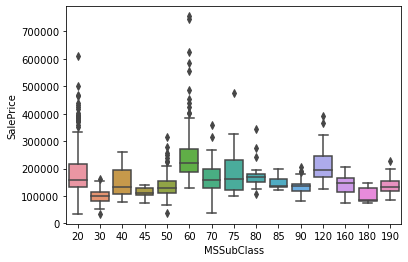

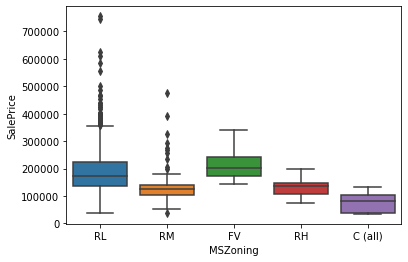

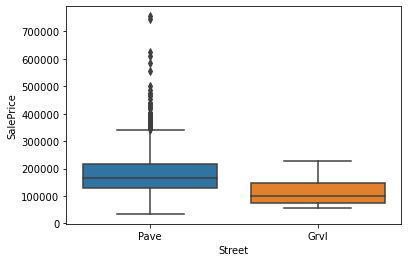

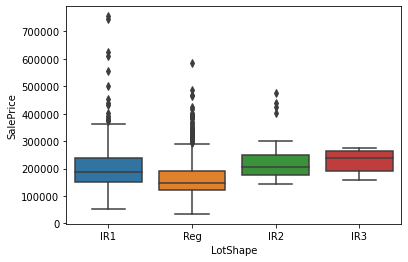

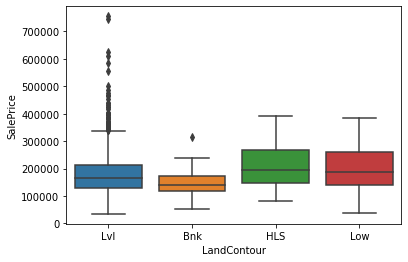

In [282]:
for i in categ[0:5]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

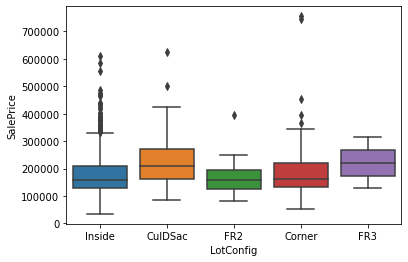

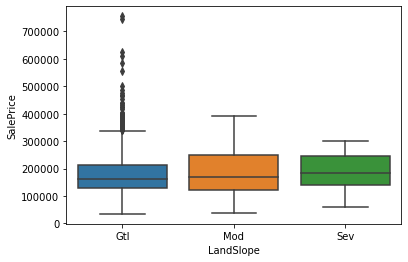

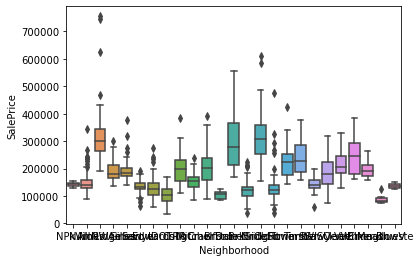

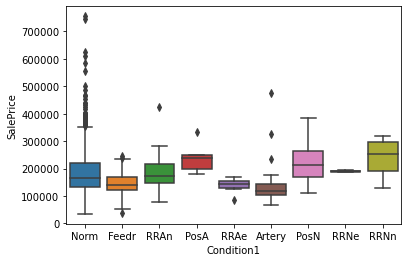

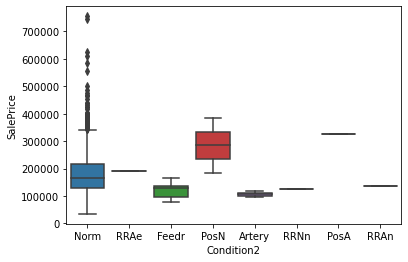

In [283]:
for i in categ[5:10]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

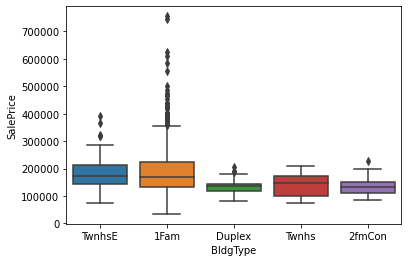

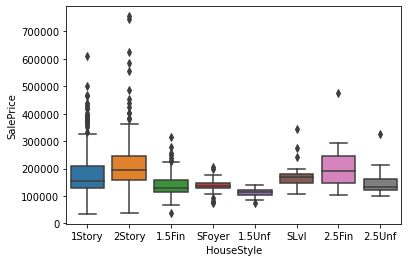

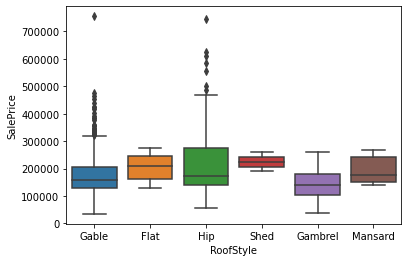

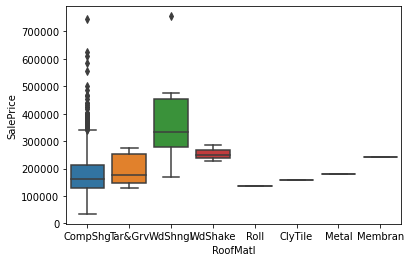

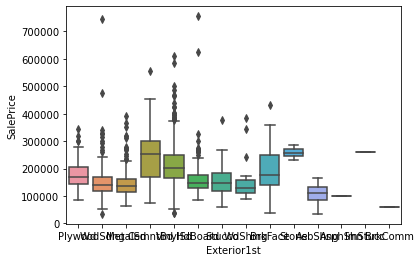

In [284]:
for i in categ[10:15]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

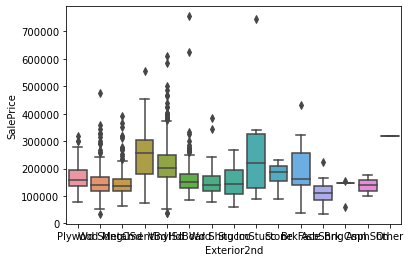

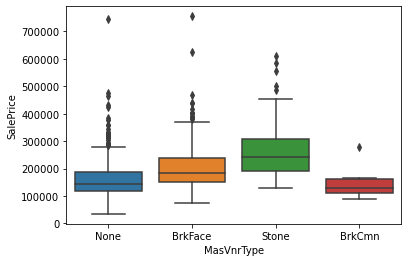

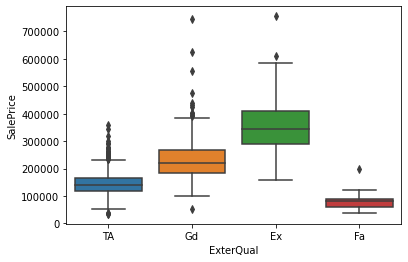

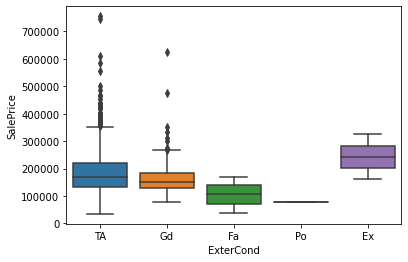

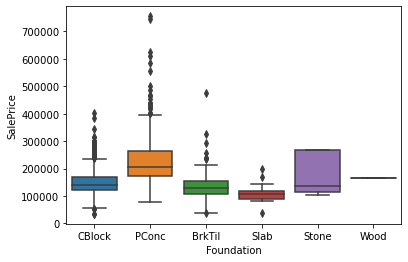

In [285]:
for i in categ[15:20]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

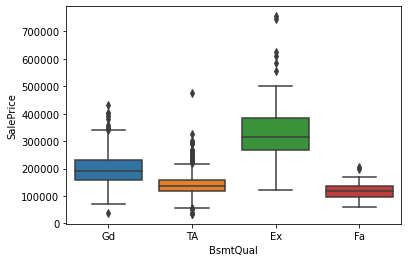

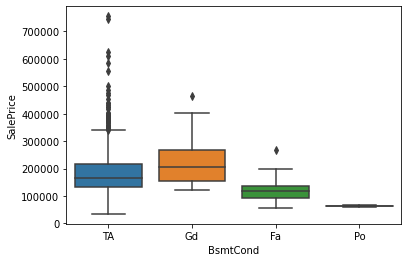

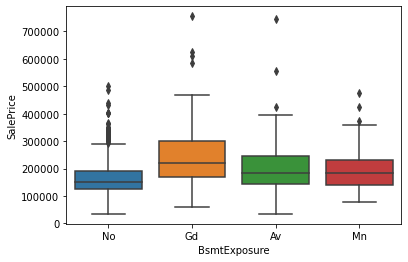

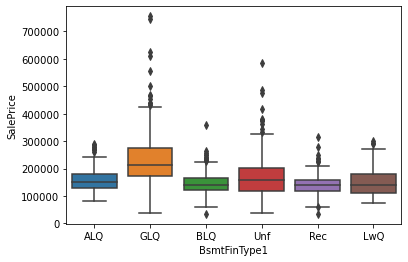

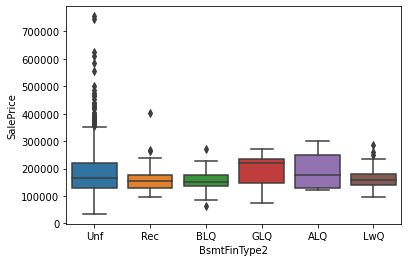

In [286]:
for i in categ[20:25]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

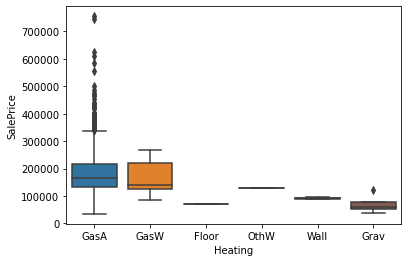

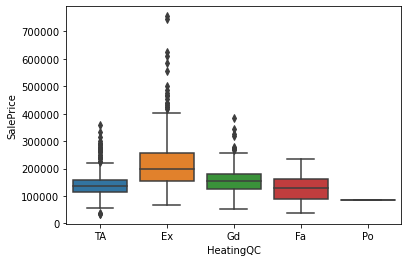

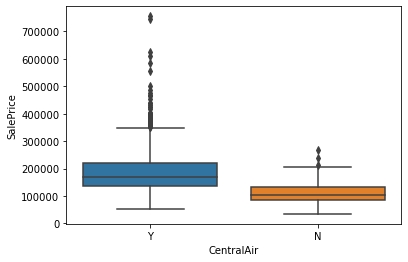

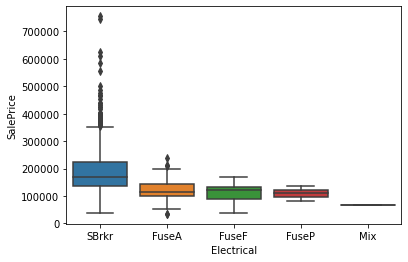

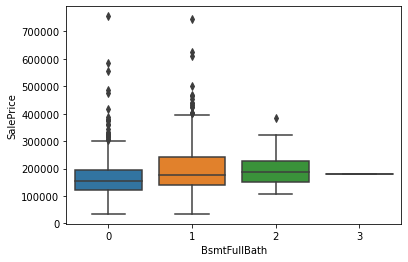

In [287]:
for i in categ[25:30]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

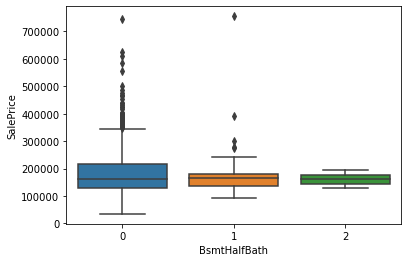

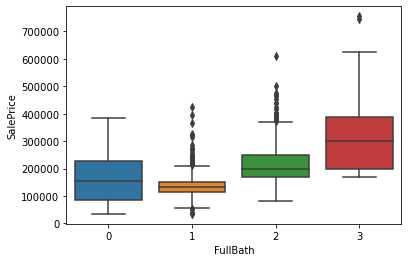

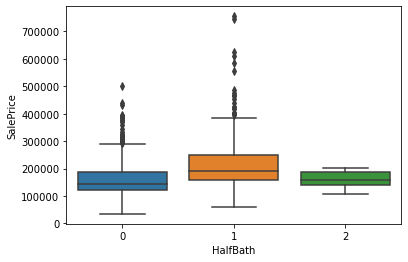

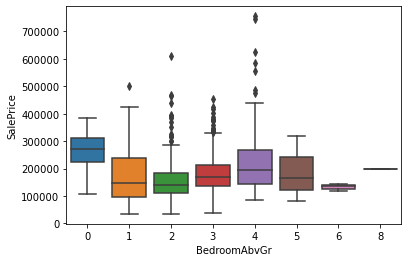

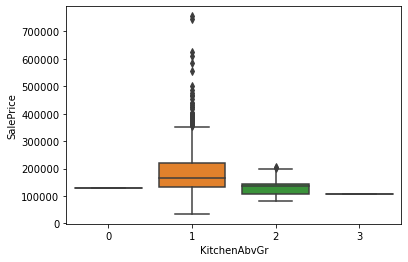

In [288]:
for i in categ[30:35]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

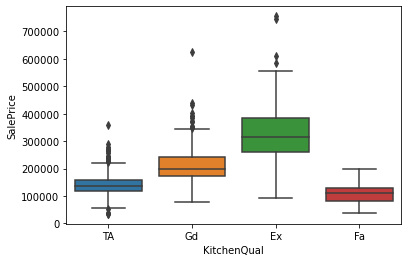

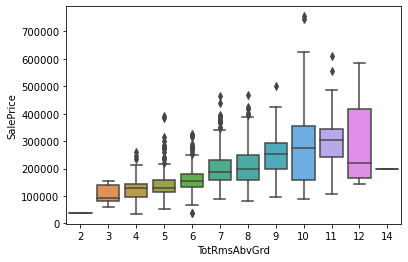

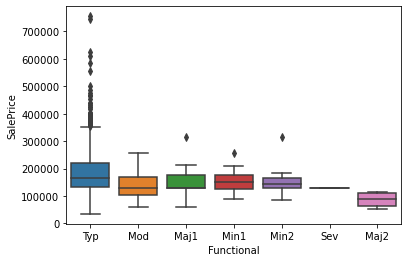

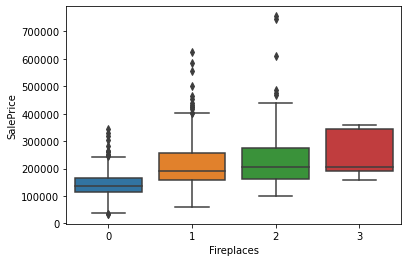

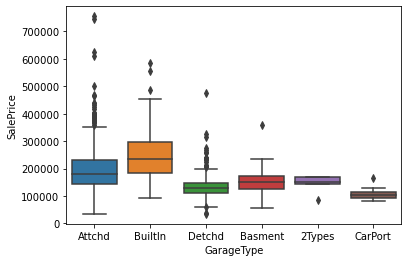

In [289]:
for i in categ[35:40]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

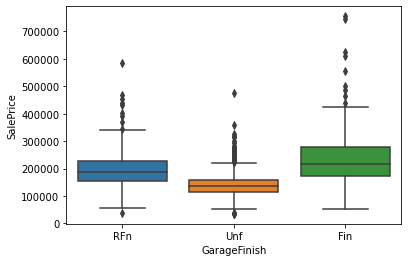

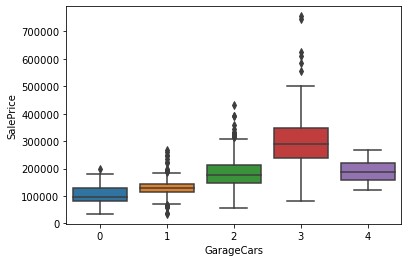

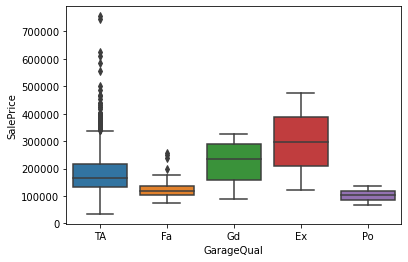

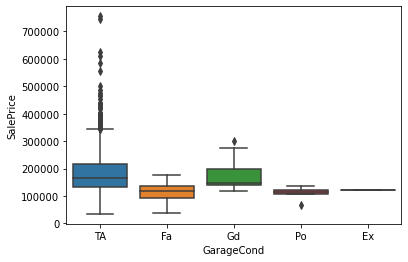

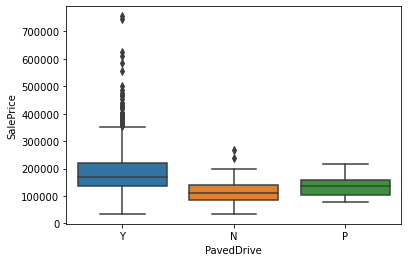

In [291]:
for i in categ[40:45]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anacond

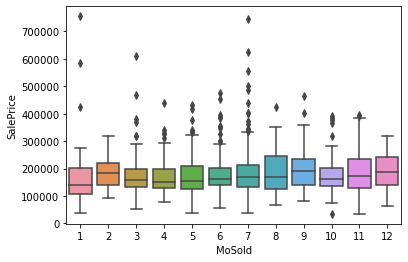

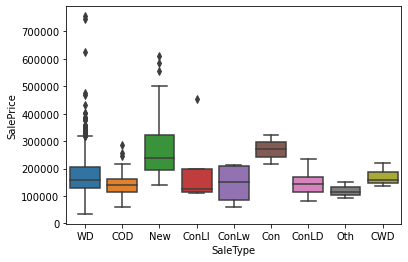

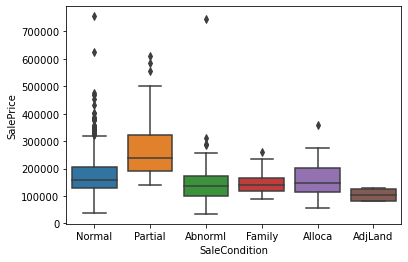

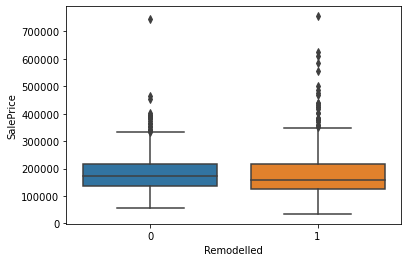

In [292]:
for i in categ[45:]:
    plt.subplots()
    sns.boxplot(df2[i],Y)

The values which pretend to be outliers can be ignored as they are categorical variables. Since, price is our target variable... we are not removing any datapoints of it.

We can see that most of the categories have an median price near to 200000.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

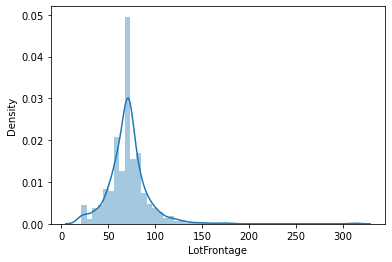

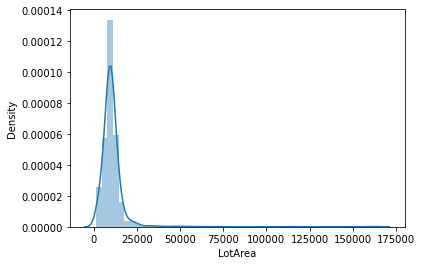

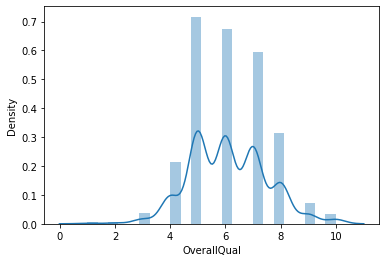

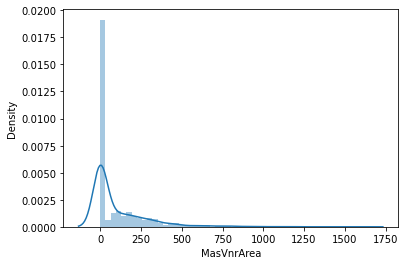

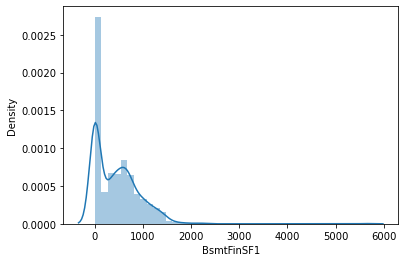

In [297]:
for i in conti[0:5]:
    plt.subplots()
    sns.distplot(df_train_final[i])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

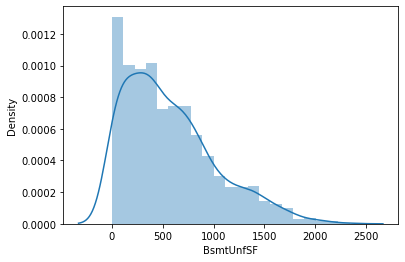

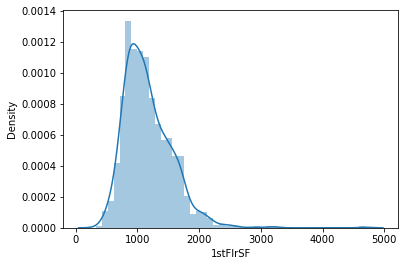

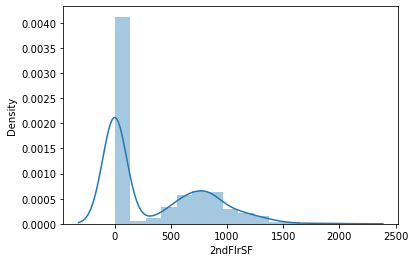

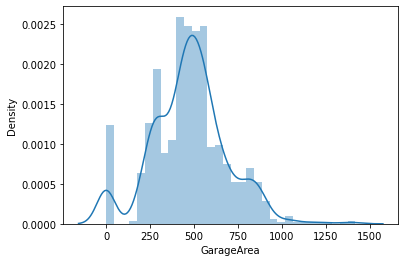

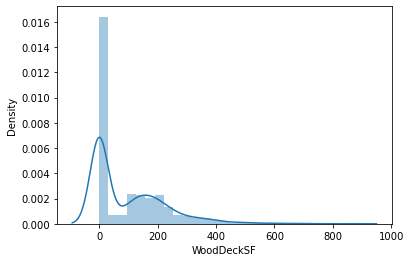

In [298]:
for i in conti[5:10]:
    plt.subplots()
    sns.distplot(df_train_final[i])

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

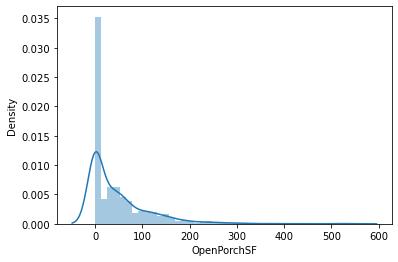

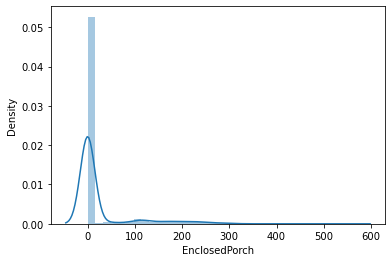

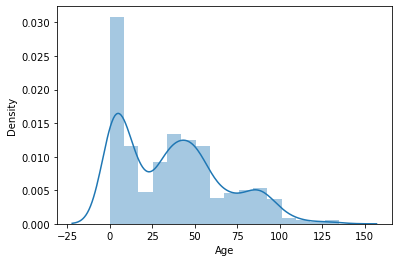

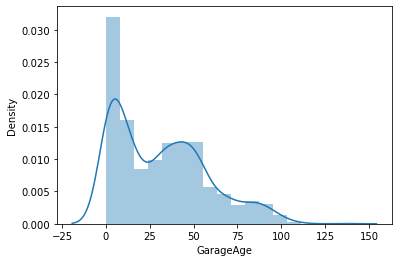

In [299]:
for i in conti[10:15]:
    plt.subplots()
    sns.distplot(df_train_final[i])

The distribution is not normal for almost all continuous variables but near to normal. Lets check their skewness

In [ ]:
for i in conti[0:5]:
    plt.subplots()
    sns.boxplot(df_train_final[i])

In [ ]:
for i in conti[5:10]:
    plt.subplots()
    sns.boxplot(df_train_final[i])

In [ ]:
for i in conti[10:15]:
    plt.subplots()
    sns.boxplot(df_train_final[i])

In [300]:
for i in conti:
    print(i , "has skewness of", df_train_final[i].skew())

LotFrontage has skewness of 2.7100997874398347
LotArea has skewness of 10.659284548299626
OverallQual has skewness of 0.1750824992845271
MasVnrArea has skewness of 2.835718180934954
BsmtFinSF1 has skewness of 1.8716059327957582
BsmtUnfSF has skewness of 0.9090571206651619
1stFlrSF has skewness of 1.5137072331415693
2ndFlrSF has skewness of 0.8234785103609108
GarageArea has skewness of 0.18966497539008143
WoodDeckSF has skewness of 1.504929246192858
OpenPorchSF has skewness of 2.41083972347696
EnclosedPorch has skewness of 3.0436098308918846
Age has skewness of 0.573127293735578
GarageAge has skewness of 0.6675025267444191


Well the skewness of only few columns is under acceptable range

In [302]:
#lets check the skewness after using log transformation
for i in conti:
    if df_train_final[i].skew() > 0.5:
        print(i , "has skewness of", np.log(df_train_final[i]).skew())

LotFrontage has skewness of -0.8559868816510183
LotArea has skewness of -0.16967981002018756
MasVnrArea has skewness of nan
BsmtFinSF1 has skewness of nan
BsmtUnfSF has skewness of nan
1stFlrSF has skewness of 0.10481572695015284
2ndFlrSF has skewness of nan
WoodDeckSF has skewness of nan
OpenPorchSF has skewness of nan
EnclosedPorch has skewness of nan
Age has skewness of nan
GarageAge has skewness of nan


C:\Users\AKHIL\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [304]:
#lets check the skewness after using sqrt transformation
for i in conti:
    if df_train_final[i].skew() > 0.5:
        print(i , "has skewness of", np.sqrt(df_train_final[i]).skew())

LotFrontage has skewness of 0.5414875557228487
LotArea has skewness of 3.659306494611423
MasVnrArea has skewness of 1.0919190250489124
BsmtFinSF1 has skewness of -0.011788519333937625
BsmtUnfSF has skewness of -0.23375181660401867
1stFlrSF has skewness of 0.6867737653735706
2ndFlrSF has skewness of 0.4255472652967661
WoodDeckSF has skewness of 0.4583033345713844
OpenPorchSF has skewness of 0.6068776463220007
EnclosedPorch has skewness of 2.306066706229043
Age has skewness of -0.21534436487168052
GarageAge has skewness of -0.16946138463953303


In [305]:
#lets check the skewness after using cbrt transformation
for i in conti:
    if df_train_final[i].skew() > 0.5:
        print(i , "has skewness of", np.cbrt(df_train_final[i]).skew())

LotFrontage has skewness of 0.021037107836842837
LotArea has skewness of 2.0130126801277886
MasVnrArea has skewness of 0.7305039089167269
BsmtFinSF1 has skewness of -0.342800787125957
BsmtUnfSF has skewness of -0.9715039188821107
1stFlrSF has skewness of 0.4779563700010249
2ndFlrSF has skewness of 0.34447100325133606
WoodDeckSF has skewness of 0.2487196229345723
OpenPorchSF has skewness of 0.19173344654180605
EnclosedPorch has skewness of 2.159752412586899
Age has skewness of -0.6472259391101524
GarageAge has skewness of -0.6620353333481163


In [354]:
#log transformation for lot area, 1st floorsf
df_train_final["LotArea"] = np.log(df_train_final["LotArea"])
df_train_final["1stFlrSF"] = np.log(df_train_final["1stFlrSF"])

df_test_final["LotArea"] = np.log(df_test_final["LotArea"])
df_test_final["1stFlrSF"] = np.log(df_test_final["1stFlrSF"])

<ipython-input-354-9183c89115ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final["LotArea"] = np.log(df_train_final["LotArea"])
<ipython-input-354-9183c89115ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final["1stFlrSF"] = np.log(df_train_final["1stFlrSF"])
<ipython-input-354-9183c89115ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [355]:
# sqrt transformation for LotFrontage, BsmtFinSF1, BsmtUnfSF, woodDeckSF
for i in ["LotFrontage","BsmtFinSF1","BsmtUnfSF","WoodDeckSF"]:
    df_train_final[i] = np.sqrt(df_train_final[i])
    df_test_final[i] = np.sqrt(df_test_final[i])

<ipython-input-355-1166363ef1f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final[i] = np.sqrt(df_train_final[i])
<ipython-input-355-1166363ef1f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final[i] = np.sqrt(df_test_final[i])


In [356]:
#cbrt for MasVnrArea, 2ndFloorSF, OpenPorchSF, EnclosedPorch
for i in ["MasVnrArea","2ndFlrSF","OpenPorchSF","EnclosedPorch"]:
    df_train_final[i] = np.cbrt(df_train_final[i])
    df_test_final[i] = np.cbrt(df_test_final[i])

<ipython-input-356-57cc0aa39f29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final[i] = np.cbrt(df_train_final[i])
<ipython-input-356-57cc0aa39f29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final[i] = np.cbrt(df_test_final[i])


In [314]:
for i in conti:
    print(i , "has skewness of", df_train_final[i].skew())

LotFrontage has skewness of 0.5414875557228487
LotArea has skewness of -0.16967981002018756
OverallQual has skewness of 0.1750824992845271
MasVnrArea has skewness of 0.7305039089167269
BsmtFinSF1 has skewness of -0.011788519333937625
BsmtUnfSF has skewness of -0.23375181660401867
1stFlrSF has skewness of 0.10481572695015284
2ndFlrSF has skewness of 0.34447100325133606
GarageArea has skewness of 0.18966497539008143
WoodDeckSF has skewness of 0.4583033345713844
OpenPorchSF has skewness of 0.19173344654180605
EnclosedPorch has skewness of 2.159752412586899
Age has skewness of 0.573127293735578
GarageAge has skewness of 0.6675025267444191


The skewness have been readjusted using transfomrations

Lets proceed with standardisation of variables.

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_train_final[conti])

In [358]:
scaled.shape

(1168, 14)

In [359]:
scaled_train = pd.DataFrame(scaled,columns=conti)

In [360]:
scaled_1 = scaler.fit_transform(df_test_final[conti])
scaled_test = pd.DataFrame(scaled_1,columns=conti)

In [361]:
for i in conti:
    df_train_final[i] = scaled_train[i]
    df_test_final[i] = scaled_test[i]

<ipython-input-361-3f0ad246ba58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final[i] = scaled_train[i]
<ipython-input-361-3f0ad246ba58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final[i] = scaled_test[i]


The continuos variables have been scaled.. The categorical variables have been encoded using dummies and need not to be scaled..

Our final datasets are ready for modelling and predicting 

In [362]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, BayesianRidge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [363]:
xtrain,xtest,ytrain,ytest = train_test_split(df_train_final,Y, test_size = 0.3, random_state = 17)

In [364]:
#testing
for i in [LinearRegression(), DecisionTreeRegressor()]:
    mod = i
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    print(i, r2_score(ytest,pred))

LinearRegression() -4.3065397687193534e+19
DecisionTreeRegressor() 0.6958681507500812


We can notice that the linear regression r2_score is negative. This means that the linear regression model has been fit badly..

In [365]:
for i in [LinearRegression(), DecisionTreeRegressor(), LogisticRegression(), SVR(), KNeighborsRegressor()]:
    mod = i
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    print(i, r2_score(ytest,pred))

LinearRegression() -4.3065397687193534e+19
DecisionTreeRegressor() 0.715233469238883
LogisticRegression() 0.5639487328140771
SVR() -0.052369096812370675
KNeighborsRegressor() 0.7765283397738478


C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [366]:
for i in [Lasso(alpha=1), Ridge(alpha=1), ElasticNet(alpha=1), HuberRegressor(), BayesianRidge()]:
    mod = i
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    print(i, r2_score(ytest,pred))

C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30367494097.3804, tolerance: 508988774.18353134
  model = cd_fast.enet_coordinate_descent(
C:\Users\AKHIL\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Lasso(alpha=1) 0.8260360873482736
Ridge(alpha=1) 0.847662046386656
ElasticNet(alpha=1) 0.7968390730201778
HuberRegressor() 0.8532188424310199
BayesianRidge() 0.8540547735407327


We can see that the regularization models are peforming so well

In [368]:
for i in [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]:
    mod = i
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    print(i, r2_score(ytest,pred))

RandomForestRegressor() 0.8548241710243194
AdaBoostRegressor() 0.7896863056487955
GradientBoostingRegressor() 0.8645755943080983
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.8555381013211456


The ensemble technique models are also performing well

Lets check the cross_val_scores of better performing models

In [371]:
import warnings

warnings.filterwarnings("ignore")

In [369]:
models = [KNeighborsRegressor(),Lasso(alpha=1), Ridge(alpha=1), ElasticNet(alpha=1), HuberRegressor(), BayesianRidge(),
         RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]

In [373]:
for i in models:
    mod = i
    
    mod = i
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    score = r2_score(ytest,pred)
    
    cvs = cross_val_score(i,df_train_final,Y, scoring = "r2", cv=5)
    print(i , "difference with cross val score is", cvs.mean()-score)
    

KNeighborsRegressor() difference with cross val score is 0.006822723844284506
Lasso(alpha=1) difference with cross val score is -0.035463799646808014
Ridge(alpha=1) difference with cross val score is -0.024189890898177024
ElasticNet(alpha=1) difference with cross val score is -0.003461163627916486
HuberRegressor() difference with cross val score is -0.007179454084832226
BayesianRidge() difference with cross val score is -0.009895446961660448
RandomForestRegressor() difference with cross val score is -0.00908637335271345
AdaBoostRegressor() difference with cross val score is -0.0039823229405059335
GradientBoostingRegressor() difference with cross val score is -0.011333748294588775
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, m

KNeighborsRegressor , ElasticNet, HuberRegerssor, BayesianRidge, RandomForestRegressor, AdaBoostRegressor have very less difference with cvs...

Everymodel has less difference but these are the very less difference showing models

Lets proceed with ElasticNet and AdaBoostRegressor as they have the least difference with cross_val_score

In [376]:
#ElasticNet()

parameters = {"max_iter": np.arange(0 , 1000 , 100), 
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

GCV = GridSearchCV(ElasticNet(), parameters, cv =5)

GCV.fit(xtrain,ytrain)

pred = GCV.predict(xtest)

print(r2_score(ytest,pred))

GCV.best_params_


0.8516636626361065


{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 200}

In [379]:
AdaBoostRegressor()

parameters = {"loss" : ['linear', 'square', 'exponential'],
            "random_state" : np.arange(0 ,54, 3)}

GCV = GridSearchCV(AdaBoostRegressor(), parameters, cv =5)

GCV.fit(xtrain,ytrain)

pred = GCV.predict(xtest)

print(r2_score(ytest,pred))

GCV.best_params_

0.8005239804047104


{'loss': 'exponential', 'random_state': 3}

ElasticNet has the better r2_score... Lets finalize this model... and save the new model with best parameters.

In [380]:
model = ElasticNet(alpha=0.1,l1_ratio = 0.5, max_iter = 200)

model.fit(df_train_final,Y)

ElasticNet(alpha=0.1, max_iter=200)

In [385]:
import pickle

filename = "Housing model"
pickle.dump(model, open(filename, "wb"))

In [386]:
predictions = model.predict(df_test_final)

In [387]:
SalePrice_predicted = pd.Series(predictions)

In [388]:
SalePrice_predicted[0:10]

0    350009.429023
1    220208.464685
2    246024.744187
3    189076.232400
4    236255.095471
5     64380.426368
6    131049.987501
7    332763.254554
8    232021.122395
9    177869.727355
dtype: float64

In [389]:
#merging the predictors and predictions and saving the dataframe

df_predicted = pd.concat([df_test,SalePrice_predicted],axis=1)

In [390]:
df_predicted.columns

Index([           'Id',    'MSSubClass',      'MSZoning',   'LotFrontage',
             'LotArea',        'Street',         'Alley',      'LotShape',
         'LandContour',     'Utilities',     'LotConfig',     'LandSlope',
        'Neighborhood',    'Condition1',    'Condition2',      'BldgType',
          'HouseStyle',   'OverallQual',   'OverallCond',     'YearBuilt',
        'YearRemodAdd',     'RoofStyle',      'RoofMatl',   'Exterior1st',
         'Exterior2nd',    'MasVnrType',    'MasVnrArea',     'ExterQual',
           'ExterCond',    'Foundation',      'BsmtQual',      'BsmtCond',
        'BsmtExposure',  'BsmtFinType1',    'BsmtFinSF1',  'BsmtFinType2',
          'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',       'Heating',
           'HeatingQC',    'CentralAir',    'Electrical',      '1stFlrSF',
            '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',  'BsmtFullBath',
        'BsmtHalfBath',      'FullBath',      'HalfBath',  'BedroomAbvGr',
        'KitchenAbvGr',  

In [393]:
df_predicted = df_predicted.rename(columns={0:'SalePrice'})

In [394]:
df_predicted.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         HLS    AllPub  ...        0    NaN   NaN         NaN       0      7   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      8   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      6   
3         Bnk    AllPub  ...        0    NaN   NaN         NaN       0      7   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      1   

  YrSold  SaleType  SaleCondition      SalePrice  
0   2007        WD         Normal  350009.429023  
1   2009       COD        Abnorml  220208.464685  
2   2009        WD         Normal  246024.744187  
3   2009        WD         Normal  189076.232400  
4   2008        WD         Normal  236255.095471  

[5 rows x 81 columns]

In [397]:
df_predicted.to_csv("housing_prediction.csv")

# Conclusion.

The best model which is finalized was ElasticNet Regression model. It is tuned with best parameters.

The r2_score is 85% which indicates that the model has a better fit.

The final model has been built and saved using the entire training dataset.

The testing data set has been used to predict the housing prices and the values have been saved to the csv file.